# Laboration - Covid-19

## Uppgift 1 - uppvärmning covid-19 data
Börja med att manuellt läsa Excel-filerna och de olika bladen i varje dokument. Använd därefter Pandas för att
läsa in bladet: "Veckodata Riket" i covid19-filen.

### a) Gör initial dataanalys för att snabbt få en överblick över datasetet. Använd metoder som ex. info(), describe(), value_counts(), head(), columns, index för att snabbt få en överblick.


In [302]:
import pandas as pd

# Läs in filen "Folkhalsomyndigheten_Covid19.xlsx" fliken "Veckodata Riket" till en dataframe.
covid_veckodata_riket = pd.read_excel("Data/Folkhalsomyndigheten_Covid19.xlsx", sheet_name="Veckodata Riket")

#covid_veckodata_riket


### b) Slå ihop kolumnerna "år" och "veckonummer" till en kolumn med namn "Vecka" med följande format:

 Vecka

 2020v6

 2020v7

 ...
 
 2021v40


In [303]:
# Skapa en ny kolumn "Vecka" med år-vecka
covid_veckodata_riket.insert(loc = 0, value = covid_veckodata_riket["år"].astype(str) + 'v' + covid_veckodata_riket["veckonummer"].astype(str), column="Vecka")

#covid_veckodata_riket

För deluppgifterna c-f, använd både Seaborn och Plotly express. För Seaborn, använd subplots så du får 2x2
grid med graferna.

### c) Rita en linjediagram som visar avlidna fall per vecka från 2020v6 till nu.

### d) Rita en linjediagram som visar nya fall per vecka från 2020v6 till nu.

### e) Rita linjediagram av både avlidna fall per vecka och nya fall per vecka i samma fönster från 2020v6 till nu.

### f) Rita linjediagram av kumulativt antal fall från 2020v6 till nu.


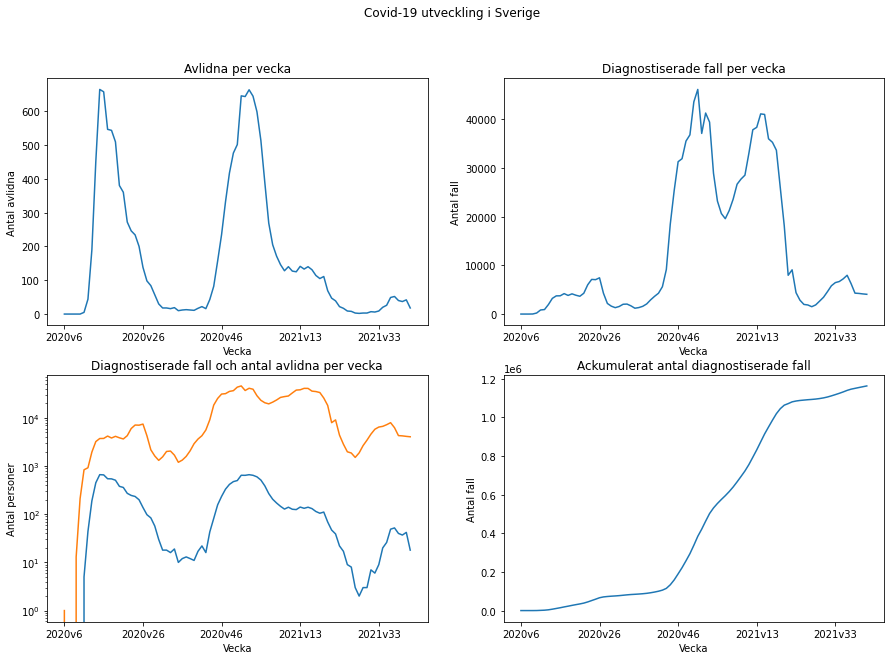

In [311]:
# Plotta med Seaborn

import seaborn as sb
import matplotlib.pyplot as plt

# Skapa en figur med 4 rutor.
fig, ax = plt.subplots(2, 2)
fig.set_size_inches(15, 10)
fig.suptitle("Covid-19 utveckling i Sverige")

# Plotta första grafen.
sb.lineplot(data=covid_veckodata_riket, x="Vecka", y="Antal_avlidna_vecka", ax=ax[0, 0])
ax[0, 0].set_title("Avlidna per vecka")
ax[0, 0].set_xticks( range(0, 100, 20) ) # Visa bara vart 20:e veckonummer
ax[0, 0].set_ylabel("Antal avlidna")

# Plotta andra grafen.
sb.lineplot(data=covid_veckodata_riket, x="Vecka", y="Antal_fall_vecka", ax=ax[0, 1])
ax[0, 1].set_title("Diagnostiserade fall per vecka")
ax[0, 1].set_xticks( range(0, 100, 20) )
ax[0, 1].set_ylabel("Antal fall")

# Plotta tredje grafen.
sb.lineplot(data=covid_veckodata_riket, x="Vecka", y="Antal_avlidna_vecka", ax=ax[1, 0])
sb.lineplot(data=covid_veckodata_riket, x="Vecka", y="Antal_fall_vecka", ax=ax[1, 0])
ax[1, 0].set_title("Diagnostiserade fall och antal avlidna per vecka")
ax[1, 0].set_xticks( range(0, 100, 20) )
ax[1, 0].set_ylabel("Antal personer")
ax[1, 0].set(yscale="log")

# Plotta fjärde grafen.
sb.lineplot(data=covid_veckodata_riket, x="Vecka", y="Kum_antal_fall", ax=ax[1, 1])
ax[1, 1].set_title("Ackumulerat antal diagnostiserade fall")
ax[1, 1].set_xticks( range(0, 100, 20) )
ax[1, 1].set_ylabel("Antal fall")

# Spara figuren som en bild.
plt.savefig("Visualiseringar/Covid-19 utveckling i Sverige.png")





In [271]:
# Plotta med Plotly Express

import plotly_express as px

# Plotta första grafen. 
fig = px.line(covid_veckodata_riket, x="Vecka", y="Antal_avlidna_vecka", title="Avlidna per vecka i Sverige", labels={"Antal_avlidna_vecka" : "Antal avlidna"})
fig.show()
fig.write_html("Visualiseringar/Avlidna per vecka i Sverige.html") # Spara figuren som html-fil.

In [293]:
# Plotta andra grafen.
fig = px.line(covid_veckodata_riket, x="Vecka", y="Antal_fall_vecka", title="Diagnostiserade fall per vecka i Sverige", labels={"Antal_fall_vecka" : "Antal fall"}) 
fig.show()
fig.write_html("Visualiseringar/Diagnostiserade fall per vecka i Sverige.html")

In [313]:
# Plotta tredje grafen.
fig = px.line(covid_veckodata_riket, x="Vecka", y=["Antal_avlidna_vecka", "Antal_fall_vecka"], title="Diagnostiserade fall och antal avlidna per vecka i Sverige", labels={"value":"Antal fall", "variable":""}, log_y=True) 
fig.show()
fig.write_html("Visualiseringar/Diagnostiserade fall och antal avlidna per vecka i Sverige.html")

In [295]:
# Plotta fjhärde grafen.
fig = px.line(covid_veckodata_riket, x="Vecka", y="Kum_antal_fall", title="Ackumulerat antal diagnostiserade fall i Sverige", labels={"Kum_antal_fall" : "Antal fall"} ) 
fig.show()
fig.write_html("Visualiseringar/Ackumulerat antal diagnostiserade fall i Sverige.html")

## Uppgift 2 - uppvärmning vaccindata

I uppgifterna nedan ska du använda dig av datasetet vaccin och bladet Vaccinerade kommun och ålder.
Använd Plotly express för att rita diagrammen nedan för de uppgifter som kräver diagram. Använd Pandas för
att svara på frågor om datasetet.

### a) Hur många län finns representerade i datasetet?


In [96]:
# Läs in filen "Folkhalsomyndigheten_Covid19_Vaccine.xlsx" fliken "Vaccinerade kommun och ålder" till en dataframe.
vaccinerade_riket = pd.read_excel("Data/Folkhalsomyndigheten_Covid19_Vaccine.xlsx", sheet_name="Vaccinerade kommun och ålder")

antal_regioner = vaccinerade_riket["Län_namn"].unique().size

print(f"Det finns {antal_regioner} regioner i Sverige.")

Det finns 21 regioner i Sverige.


### b) Hur många kommuner finns representerade i datasetet?

In [93]:
antal_kommuner = vaccinerade_riket["Kommun_namn"].unique().size
print(f"Det finns {antal_kommuner} kommuner i Sverige.")

Det finns 290 kommuner i Sverige.


### c) Hur stor är befolkningen som är representerad i datasetet?

In [115]:
befolkning_över_16 = vaccinerade_riket["Befolkning"].sum()
print(f"Befolning över 16 år är {befolkning_över_16:,}.".replace(',', ' '))

Befolning över 16 år är 8 541 497.


 ### d) Beräkna hur många barn under 16 år det finns i Sverige. Du får leta upp statistik på hur stor totala befolkningen är i Sverige.


In [370]:
# Total befolkning i Sverige från SCB. 
# Augusti 2021 är senaste datan. Egentligen skulle det vara för oktober. Kanske borde man extrapolera till oktober då skulle det öka ca 10 000 personer.
link = "https://www.scb.se/hitta-statistik/statistik-efter-amne/befolkning/befolkningens-sammansattning/befolkningsstatistik/pong/tabell-och-diagram/manadsstatistik--riket/befolkningsstatistik-2021/" 
scb_befolkningsstatistik = pd.read_html(link, thousands='\xa0', decimal=',' )[0] # Tabell på scb.se 
tot_befolkning = int(scb_befolkningsstatistik.loc[7, "2021"][0]) # Plocka ut total befolkning i Sverige auguti 2021

barn_under_16 = tot_befolkning - befolkning_över_16
print(f"Antalet barn under 16 är {barn_under_16}.")

Antalet barn under 16 är 1885799.


### e) Rita stapeldiagram för andel med minst 1 dos per län och andel färdigvaccinerade per län

In [307]:
# Skapa en dataframe grupperad på län
vaccinerade_län = vaccinerade_riket.groupby("Län_namn").sum()
vaccinerade_län.drop(["Län", "Kommun"], axis="columns", inplace=True) # Ta bort irelevanta kolumner 

# Beräkna andel vaccinerade
vaccinerade_län["Andel minst 1 dos"] = vaccinerade_län["Antal minst 1 dos"] /  vaccinerade_län["Befolkning"]
vaccinerade_län["Andel färdigvaccinerade"] = vaccinerade_län["Antal färdigvaccinerade"] /  vaccinerade_län["Befolkning"]

# Plotta stapeldiagram
fig = px.bar(vaccinerade_län, x=vaccinerade_län.index, y=["Andel minst 1 dos", "Andel färdigvaccinerade"], barmode='group', title="Andel vaccinerade per län", labels={"Län_namn" : "Län", "value" : "Andel vaccinerade", "variable" : ""})
fig.show()
fig.write_html("Visualiseringar/Andel vaccinerade per län.html") # Spara figur till fil


### f) Rita ett stapeldiagram med län i x-axeln och staplar för befolkning > 16år, antal minst 1 dos och antal färdigvaccinerade.


In [297]:
# Plotta stapeldiagram
fig = px.bar(vaccinerade_län, x=vaccinerade_län.index, y=["Antal minst 1 dos", "Antal färdigvaccinerade"], barmode='group', title="Antal vaccinerade per län", labels={"Län_namn" : "Län", "value" : "Antal vaccinerade", "variable" : ""})
fig.show()
fig.write_html("Visualiseringar/Antal vaccinerade per län.html") # Spara figur till fil

## Uppgift 3 - KPIer & explorativ dataanalys

Definiera 3-6 KPIer utöver de som använts i ovanstående uppgifter och gör explorativ dataanalys på flera
sheets på båda Excel-filerna. Se till att dokumentera vad du undersöker med markdown kombinerad med kod
i Jupyter notebook eller om du använder Pythonskript, skriv en markdown vid sidan om. Dokumentera också
vad du kommer fram till och spara alla visualiseringar.

### Antall fall, intensivvårdade och avlidna i olika åldersgrupper


In [371]:
# Läst in excelfil till dataframe
covid_åldersgrupp = pd.read_excel("Data/Folkhalsomyndigheten_Covid19.xlsx", sheet_name="Totalt antal per åldersgrupp")

# Plotta stapeldiagram Antal intensivvårdade och avlidna per åldersgrupp i Sverige
fig = px.bar(covid_åldersgrupp, x="Åldersgrupp", y=[ "Totalt_antal_intensivvårdade", "Totalt_antal_avlidna"], barmode='group', title="Antal intensivvårdade och avlidna per åldersgrupp i Sverige", labels={"value" : "Antal personer", "variable" : ""}, log_y=False)
fig.show()
fig.write_html("Visualiseringar/Antal intensivvårdade och avlidna per åldersgrupp i Sverige.html")


# Plotta stapeldiagram Antal diagonstiserade fall och avlidan per åldersgrupp i Sverige
fig = px.bar(covid_åldersgrupp, x="Åldersgrupp", y=["Totalt_antal_fall", "Totalt_antal_avlidna"], barmode='group', title="Antal diagonstiserade fall och avlidan per åldersgrupp i Sverige", labels={"value" : "Antal personer", "variable" : ""}, log_y=False)
fig.show()
fig.write_html("Visualiseringar/Antal diagonstiserade fall och avlidan per åldersgrupp i Sverige.html")


### Hur har det gått i Askersund?
Lite snålt med data för kommuner men antal fall per vecka och andel vaccinerade i olika åldersgrupper gick att få fram.


In [372]:
# Läs in coviddata för kommuner
covid_Kommun = pd.read_excel("Data/Folkhalsomyndigheten_Covid19.xlsx", sheet_name="Veckodata Kommun_stadsdel")
covid_Askersund = covid_Kommun[covid_Kommun["KnNamn"] == "Askersund"][18:] # Välj ut data för Askersund. Ta bort veckor i början med ofullständig data.

# Typomvandla till tal
covid_Askersund["tot_antal_fall"] = covid_Askersund["tot_antal_fall"].astype(int)
covid_Askersund["nya_fall_vecka"] = covid_Askersund["nya_fall_vecka"].astype(int)

# Skapa en ny kolumn "Vecka" med år-vecka
covid_Askersund.insert(loc = 0, value = covid_Askersund["år"].astype(str) + 'v' + covid_Askersund["veckonummer"].astype(str), column="Vecka")
#covid_Askersund

In [299]:
fig = px.line(covid_Askersund, x="Vecka", y=["nya_fall_vecka"], title="Antal fall per vecka, Askersund", labels={"value" : "Antal fall", "variable" : ""}, log_y=False) 
fig.show()
fig.write_html("Visualiseringar/Antal fall per vecka, Askersund.html")

In [373]:
vaccinerade_Kommun_åldersgrupp = pd.read_excel("Data/Folkhalsomyndigheten_Covid19_Vaccine.xlsx", sheet_name="Vaccinerade kommun och ålder")
vaccinerade_Askersund_åldersgrupp = vaccinerade_Kommun_åldersgrupp[vaccinerade_Kommun_åldersgrupp["Kommun_namn"] == "Askersund"] # Välj ut data för Askersund.

vaccinerade_Kommun = pd.read_excel("Data/Folkhalsomyndigheten_Covid19_Vaccine.xlsx", sheet_name="Vaccinerade kommun")

vaccinerade_Askersund_tot = vaccinerade_Kommun[vaccinerade_Kommun["KnNamn"] == "Askersund"] # Välj ut data för Askersund.
vaccinerade_Askersund_tot.rename({ "KnKod":"Kommun", "KnNamn":"Kommun_namn", "Antal_dos1":"Antal minst 1 dos", "Antal_färdigvaccinerade":"Antal färdigvaccinerade", "Andel_dos1":"Andel minst 1 dos",  "Andel_färdigvaccinerade": "Andel färdigvaccinerade"}, axis="columns", inplace=True)
vaccinerade_Askersund_tot["Ålder"] = "Alla åldrar" 

vaccinerade_Askersund_åldersgrupp = pd.concat([vaccinerade_Askersund_åldersgrupp, vaccinerade_Askersund_tot] )

#vaccinerade_Askersund_åldersgrupp

C:\Users\ErikLarsson-AIU21GBG\.virtualenvs\Databehandling-Erik-Larsson-vuWwzBfF\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ERIKLA~1\AppData\Local\Temp/ipykernel_3436/3163466883.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [300]:

fig = px.bar(vaccinerade_Askersund_åldersgrupp, x="Ålder", y=[ "Andel minst 1 dos", "Andel färdigvaccinerade" ], barmode='group', title="Andel vaccinerade i Askersunds kommun", labels={"value" : "Andel vaccinerade", "variable" : ""}, log_y=False)
fig.show()
fig.write_html("Visualiseringar/Andel vaccinerade i Askersunds kommun.html")

Vaccinationer i Örebro, T-län
Eftersom det är ont om data på Askersund tar vi lite på hela länet


In [374]:
vaccinerade_vecka = pd.read_excel("Data/Folkhalsomyndigheten_Covid19_Vaccine.xlsx", sheet_name="Vaccinerade tidsserie")
vaccinerade_örebro_län = vaccinerade_vecka[vaccinerade_vecka["Region"] == "Örebro"]

vaccinerade_örebro_län.insert(loc = 0, value = vaccinerade_örebro_län["År"].astype(str) + 'v' + vaccinerade_örebro_län["Vecka"].astype(str), column="År-vecka")
#vaccinerade_örebro_län

In [288]:
fig = px.line(vaccinerade_örebro_län, x="År-vecka", y=["Andel vaccinerade"], line_group="Vaccinationsstatus", color="Vaccinationsstatus" , title="Andel vaccinerade T-län", labels={"value" : "Andel"}, log_y=False) 

fig.show()
fig.write_html("Visualiseringar/Andel vaccinerade T-län.html")